In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



In [2]:
from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

In [4]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataX=data.iloc[:,3:13]
dataY=data.iloc[:,13]
print(dataX.head(5))
print(dataY.head(5))


   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [6]:
geography=pd.get_dummies(dataX['Geography'],drop_first=True)
Gender=pd.get_dummies(dataX['Gender'],drop_first=True)

In [7]:
dataX=pd.concat([dataX,geography],axis=1)
dataX=pd.concat([dataX,Gender],axis=1)


In [8]:
dataX.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
dataX=dataX.drop(['Geography','Gender'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=2)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [12]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,PReLU,ELU,Dropout


In [13]:
classifier=Sequential()
classifier.add(Dense(units=6,kernel_initializer='gur',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid',input_dim=11))
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 5s 4ms/step - loss: 0.8158 - accuracy: 0.4387 - val_loss: 0.6210 - val_accuracy: 0.6997
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5685 - accuracy: 0.7709 - val_loss: 0.5311 - val_accuracy: 0.8020
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5220 - accuracy: 0.7903 - val_loss: 0.5043 - val_accuracy: 0.8020
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5020 - accuracy: 0.7908 - val_loss: 0.4877 - val_accuracy: 0.8027
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4879 - accuracy: 0.7910 - val_loss: 0.4747 - val_accuracy: 0.8046
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4774 - accuracy: 0.7936 - val_loss: 0.4639 - val_accuracy: 0.8073
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4683 - accuracy: 0.7953 - val_loss: 0.4545 - val_accuracy: 0.8084

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print(model_history.history['accuracy'])

[0.6350065469741821, 0.7727187871932983, 0.7883933782577515, 0.7876469492912292, 0.7904459834098816, 0.7960440516471863, 0.7994028925895691, 0.8018286824226379, 0.8050009608268738, 0.8098526000976562, 0.8122783899307251, 0.8171300888061523, 0.8206754922866821, 0.8219817280769348, 0.8255271315574646, 0.827206552028656, 0.8300055861473083, 0.8318716287612915, 0.8342974185943604, 0.8361634612083435, 0.8365366458892822, 0.8387758731842041, 0.8387758731842041, 0.8397089242935181, 0.8415749073028564, 0.841015100479126, 0.844187319278717, 0.8426945209503174, 0.8428811430931091, 0.8454935550689697, 0.8438141345977783, 0.845120370388031, 0.8475461602210999, 0.8460533618927002, 0.8469863533973694, 0.8475461602210999, 0.8475461602210999, 0.8469863533973694, 0.8477327823638916, 0.8471729755401611, 0.8482925891876221, 0.8462399840354919, 0.8477327823638916, 0.8475461602210999, 0.8482925891876221, 0.849412202835083, 0.849412202835083, 0.849412202835083, 0.8490390181541443, 0.8509050011634827, 0.8501

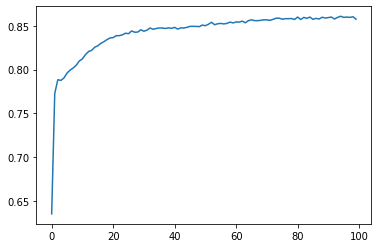

In [ ]:
plt.plot(model_history.history['accuracy'])

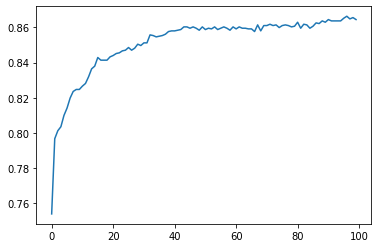

In [ ]:
plt.plot(model_history.history['val_accuracy'])

In [ ]:
Y_pred=classifier.predict(X_test)

Y_pred=(Y_pred>0.5)
print(Y_pred)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[   3 1614]
 [   2  381]]
